**TEXT CLASSIFICATIONS USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

1. Data Exploration and Preprocessing

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/blogs.csv.xls')

# Basic info
print(df.info())
print(df.head())
print(df['Labels'].value_counts())  # View category distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.bas

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords & stem
    return ' '.join(words)

df['Cleaned_Data'] = df['Data'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2. Feature Extraction and Naive Bayes Model

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.825
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.87      0.80      0.83        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.med       0.88      0.88      0.88    

3. Sentiment Analysis

In [6]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)


Sentiment
Neutral     1081
Positive     782
Negative     137
Name: count, dtype: int64
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53      

<Axes: title={'center': 'Sentiment Distribution by Category'}, xlabel='Labels'>

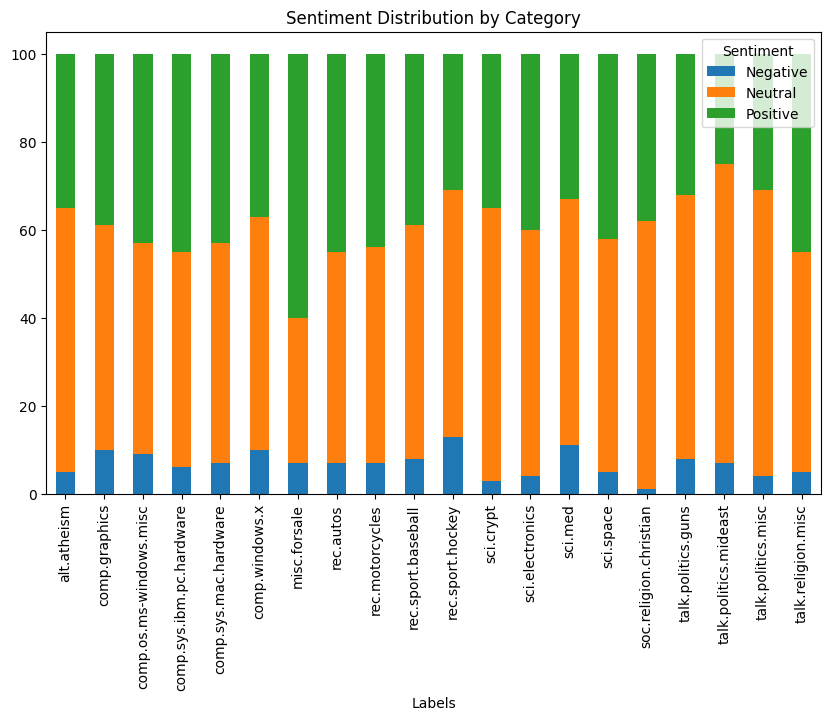

In [7]:
# Sentiment distribution
print(df['Sentiment'].value_counts())

# Sentiment by category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_category)
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), title='Sentiment Distribution by Category')


4. Evaluation

Accuracy: 0.8250
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.87      0.80      0.83        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.med       0.88

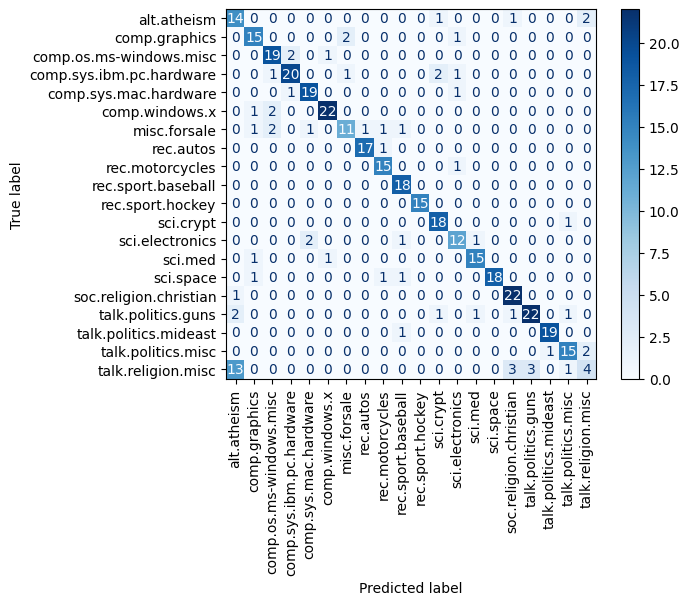

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90, cmap='Blues', values_format='d')


**Narrative Discussion**
* The accuracy score of the classifier
was {insert_accuracy_here}, which indicates how well the model is able to predict the correct category for the blog posts.
* The classification report provides insights into:
  * Precision: How many selected items were relevant.
  * Recall: How many relevant items were selected.
  * F1-score: Harmonic mean of precision and recall.
* The confusion matrix visualizes category-wise performance and reveals which classes were frequently misclassified.
* Some categories may have had overlapping vocabulary, leading to misclassification.

In [14]:
from textblob import TextBlob

# Function to assign sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to original Data column (not cleaned version)
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Summary of overall sentiment
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
Neutral     1081
Positive     782
Negative     137
Name: count, dtype: int64


<ipython-input-15-7de4e9504119>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


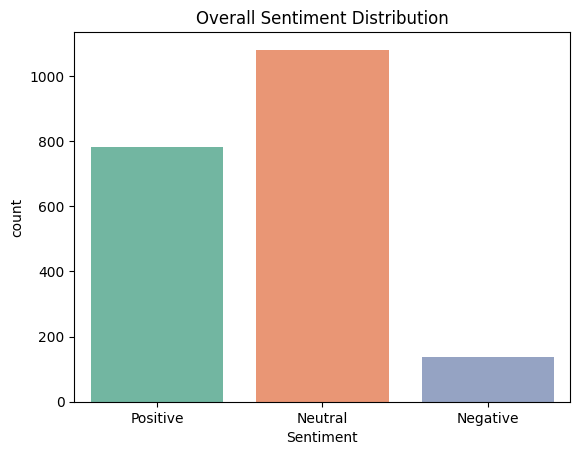

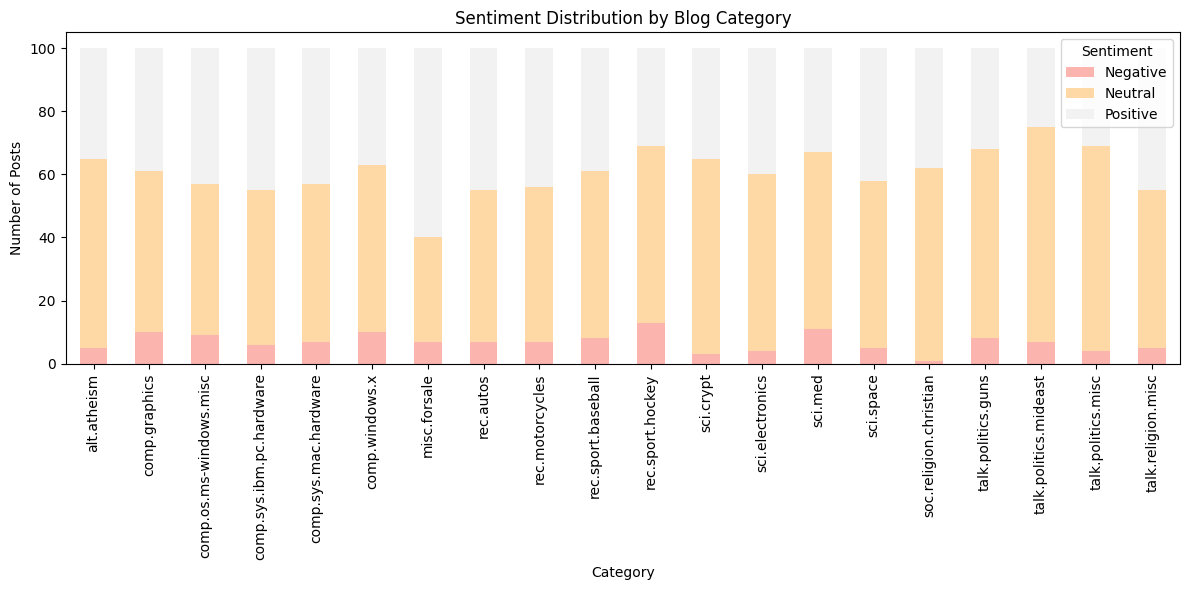

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot overall sentiment
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.show()

# Sentiment distribution by blog category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title('Sentiment Distribution by Blog Category')
plt.ylabel('Number of Posts')
plt.xlabel('Category')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


**Narrative Discussion**
* Most blogs showed a {insert_most_common_sentiment} sentiment.
* Categories such as {insert_category_name} showed stronger positive/negative/neutral sentiment compared to others.
* This reflects how some blog categories (e.g., personal experiences) tend to be more emotionally expressive, while others (e.g., tech/news) may stay more neutral or objective.
* Sentiment analysis provided additional insight into the tone and emotional content across categories.